In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
df=pd.read_csv('/content/insurance_data.csv')

In [ ]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df.shape

(1340, 10)

In [ ]:
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [ ]:
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [ ]:
mode=df['age'].mode().values[0]
df['age']= df['age'].replace(np.nan,mode)

In [ ]:
df.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [ ]:
df=df.dropna(axis=0,how='any')
print(df.isnull().sum())
df.shape

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64


(1337, 10)

In [ ]:
df1=df.drop(['PatientID'], axis=1)

In [ ]:
df1.duplicated().value_counts()

False    1337
dtype: int64

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,38.104712,11.096047,18.00,29.00,38.00,47.00,60.00
bmi,1337.0,30.672924,6.112768,16.00,26.20,30.40,34.70,53.10
bloodpressure,1337.0,94.169035,11.438582,80.00,86.00,92.00,99.00,140.00
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
claim,1337.0,13279.668295,12109.827623,1121.87,4746.34,9386.16,16657.72,63770.43


Now let us distinguish the Body Mass Indexes into the following categories:

In [ ]:
df1.head()


,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
def bmi_to_cat(bmi: float) -> str:
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal Weight'
    elif 25 <= bmi < 30: return 'Overweight'
    elif 30 <= bmi < 35: return 'Obese'
    elif 35 <= bmi < 40: return 'Severely Obese'
    elif 40 <= bmi: return 'Morbidly Obese'
    
df1.insert(3, 'bmi_cat', df1['bmi'].apply(bmi_to_cat))
df1.head()

,age,gender,bmi,bmi_cat,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,Normal Weight,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,Obese,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,Obese,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,Obese,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,Obese,100,No,0,No,northwest,1137.01


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df1, x="bmi", y="age", color="bmi_cat")
fig.show()

In [ ]:
pd.crosstab(df1.gender, df1.smoker, margins = True)

smoker,No,Yes,All
gender,,,
female,547,115,662
male,516,159,675
All,1063,274,1337


In [ ]:
insurance=df1

In [ ]:
insurance

,age,gender,bmi,bmi_cat,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,Normal Weight,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,Obese,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,Obese,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,Obese,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,Obese,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,Severely Obese,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,Severely Obese,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,Obese,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,Obese,106,No,0,Yes,southeast,62592.87


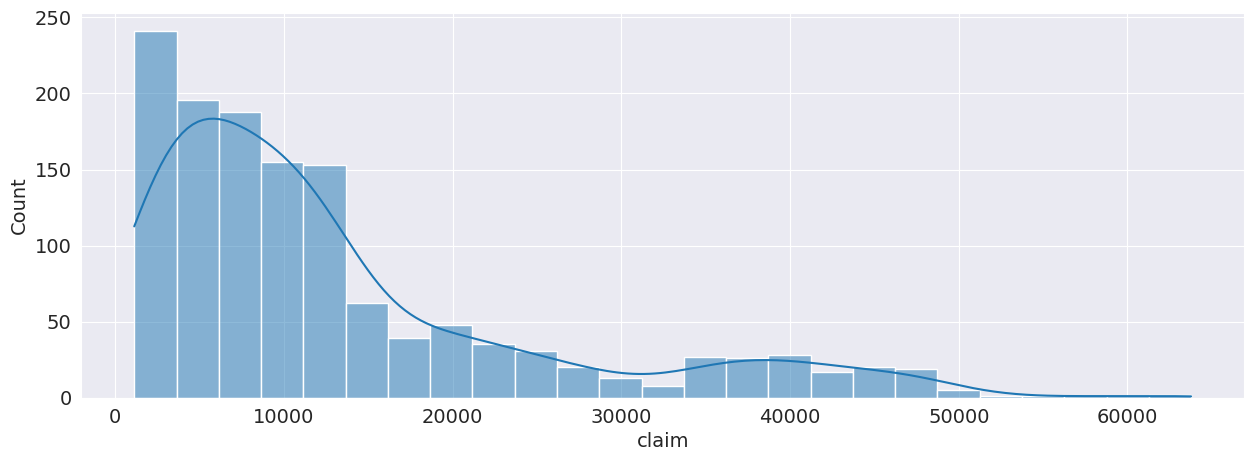

In [ ]:
sns.histplot(data=insurance, x='claim', bins=25 ,kde=True);

By the looks of it, it is right tailed and it surely has outliers.
Let's define a function to find out the lower and the upper whisker using Z-Score method:

In [ ]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [ ]:
out_zscore(insurance.claim)

Total number of outliers are 7


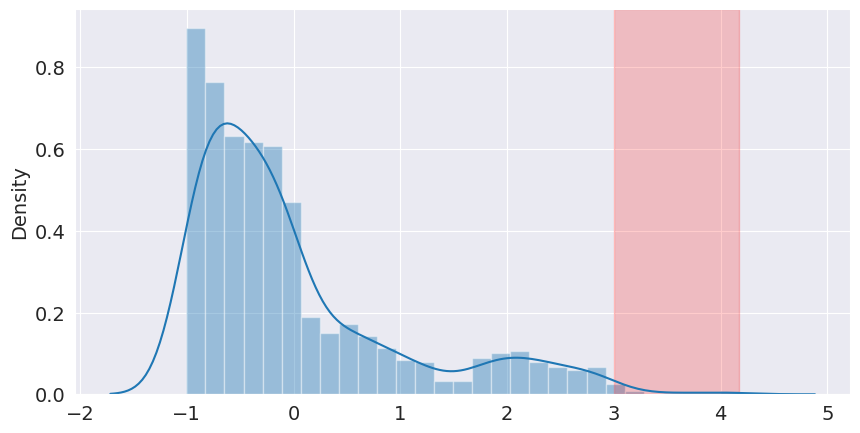

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

Red zone represent outliers

Remedial Measure:
Remove the records which are above the upper bound value and records below the lower bound value!

In [ ]:
#Data Frame without outliers
insurance_new = insurance[(insurance['claim'] < 3) | (insurance['claim'] > -3)]

In [ ]:
insurance_new

,age,gender,bmi,bmi_cat,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,Normal Weight,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,Obese,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,Obese,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,Obese,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,Obese,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,Severely Obese,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,Severely Obese,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,Obese,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,Obese,106,No,0,Yes,southeast,62592.87


In [ ]:
insurance_new.age.describe()

count    1337.000000
mean       38.104712
std        11.096047
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

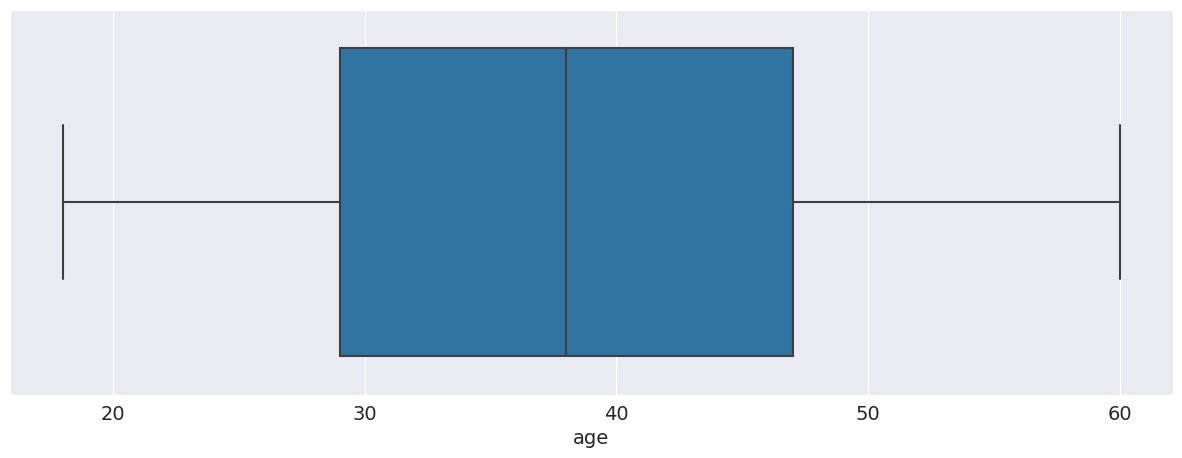

In [ ]:
sns.boxplot(data=insurance_new, x='age');

In [ ]:
insurance_new.gender.value_counts() 

male      675
female    662
Name: gender, dtype: int64

In [ ]:
pd.crosstab([insurance_new.gender,insurance_new.smoker],insurance_new.bmi_cat, margins = True)

bmi_cat        Morbidly Obese  Normal Weight  Obese  Overweight  \
gender smoker                                                     
female No                  34             88    159         169   
       Yes                  7             28     26          31   
male   No                  38             85    156         144   
       Yes                 14             22     46          43   
All                        93            223    387         387   

bmi_cat        Severely Obese  Underweight   All  
gender smoker                                     
female No                  89            8   547  
       Yes                 19            4   115  
male   No                  86            7   516  
       Yes                 33            1   159  
All                       227           20  1337

In [ ]:
fig = px.histogram(insurance_new, x='bmi_cat', color='gender', barmode='group', facet_col='smoker')
fig.show()

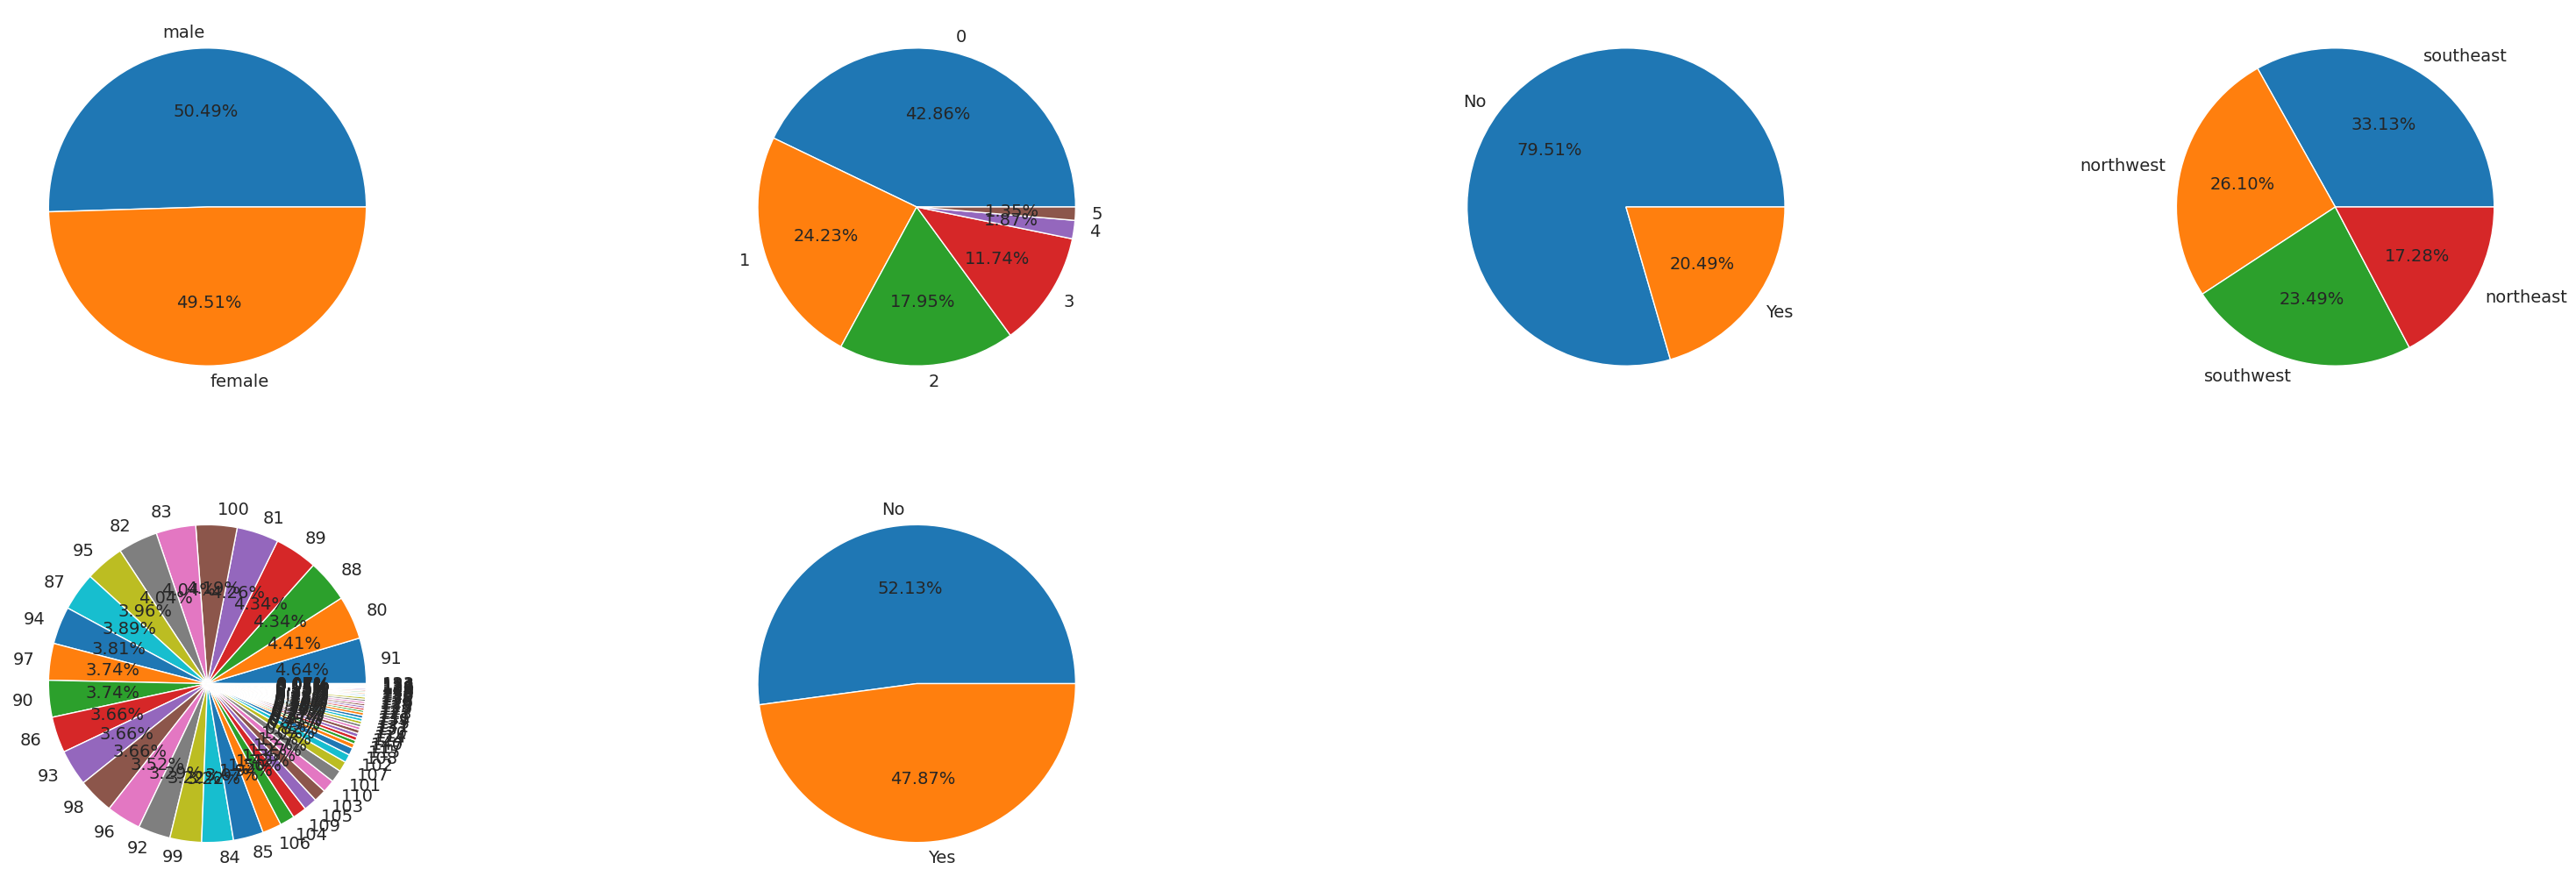

In [ ]:
features = ['gender', 'children', 'smoker', 'region','bloodpressure','diabetic']

plt.subplots(figsize=(40, 20))
for i, col in enumerate(features):
	plt.subplot(3, 4, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%2.2f%%')

plt.show()


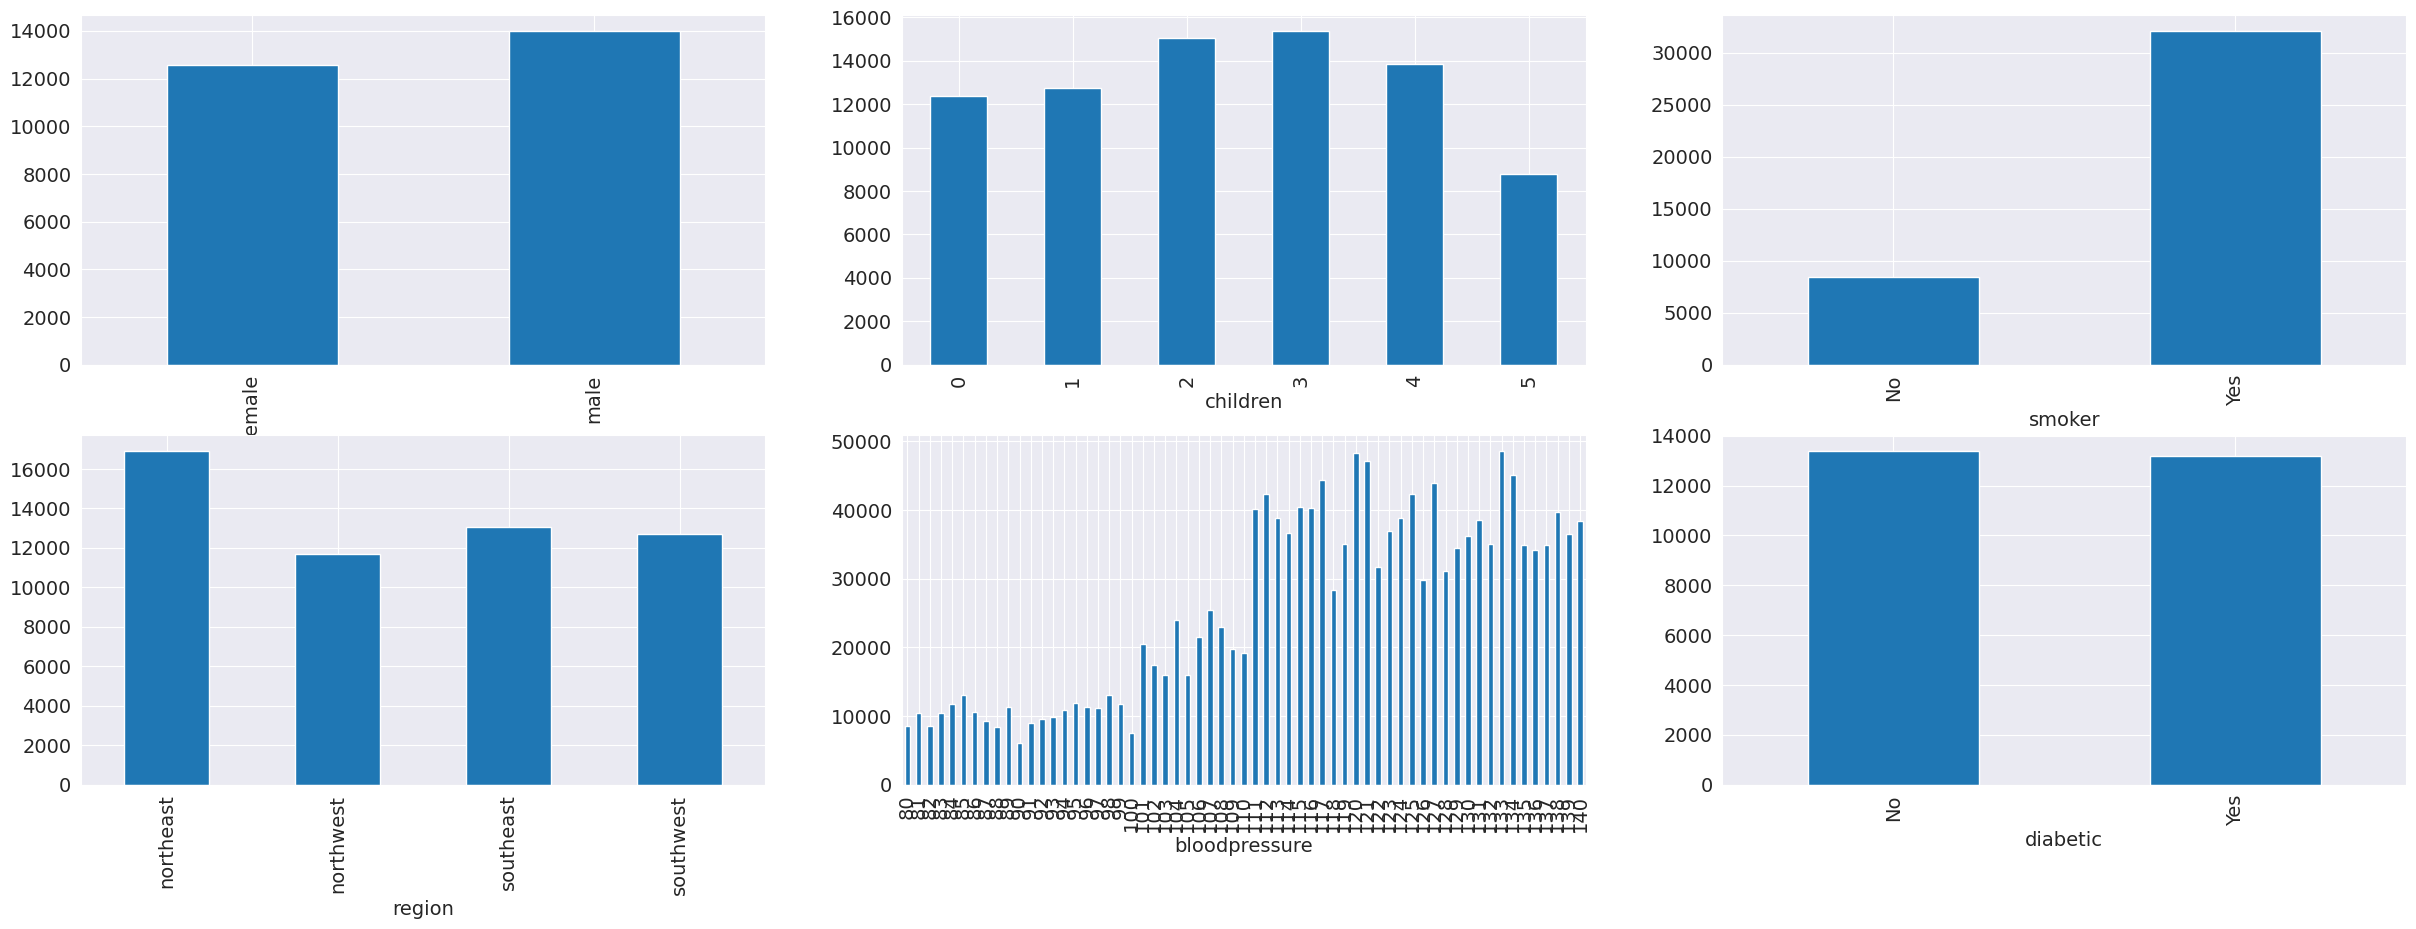

In [ ]:
features = ['gender', 'children', 'smoker', 'region','bloodpressure','diabetic']

plt.subplots(figsize=(30, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df.groupby(col).mean()['claim'].plot.bar()
plt.show()


Above shows claim accross all independant variables. 

Observations: -

expenses doesnot varies much with respect to 'Gender' feature

Smoker has to pay more than Non-Smoker

expenses doesnot varies much with respect to 'region' feature

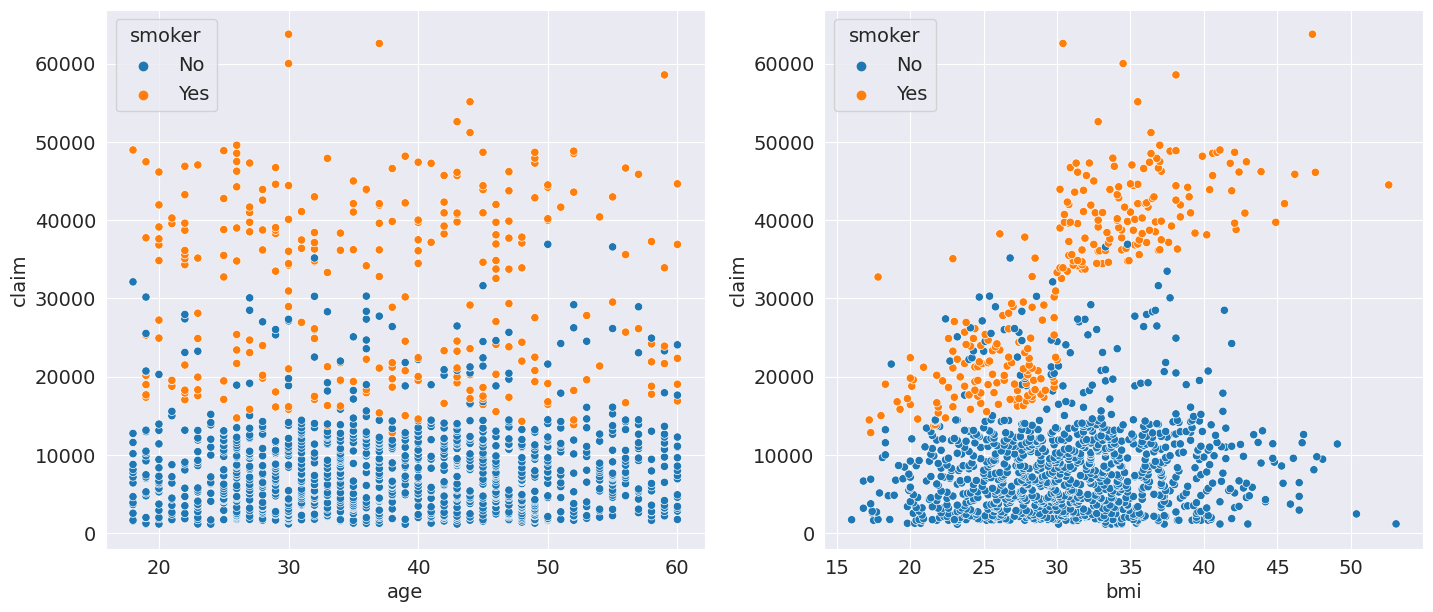

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=insurance_new, x=col,
				y='claim',
				hue='smoker')
plt.show()


A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

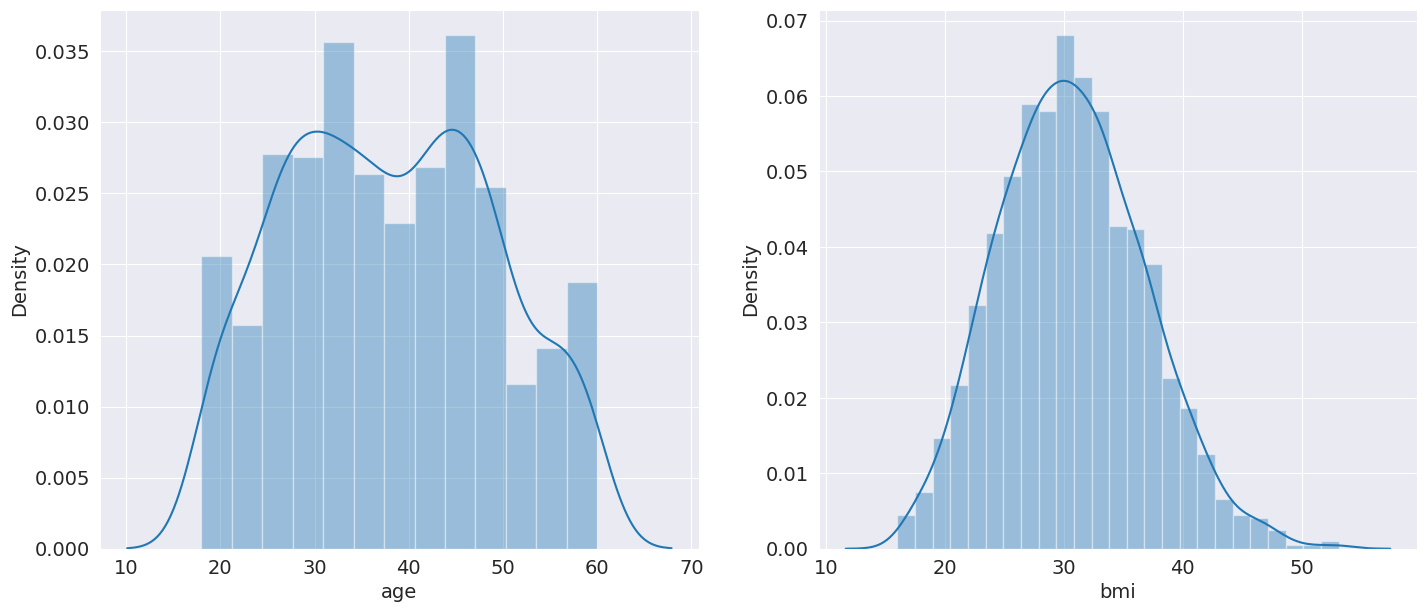

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.distplot(insurance_new[col])
plt.show()


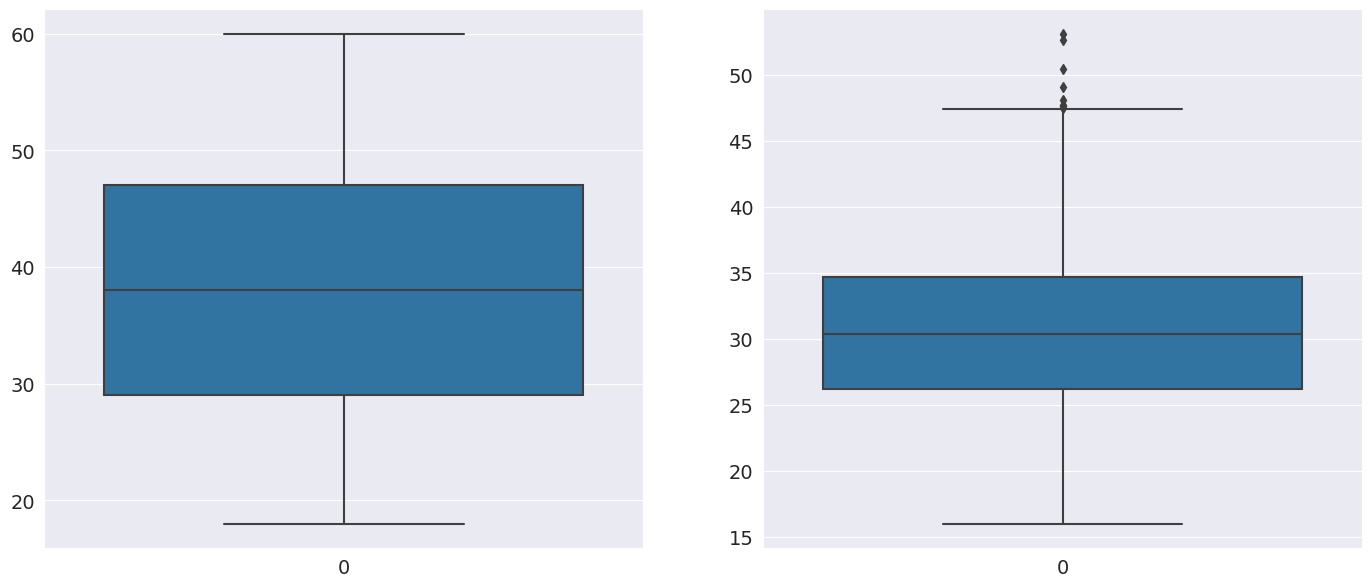

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.boxplot(insurance_new[col])
plt.show()


In [ ]:
insurance_new.shape, insurance_new[insurance_new['bmi']<45].shape


((1337, 10), (1317, 10))

We will lose only 20 data points and the dataset will become free from any outliers so, we can do this sacrifice.

In [ ]:
insurance_new =insurance_new[insurance_new['bmi']<45]


To analyze the correlation between the features of this dataset we must perform the LabelEncoding of the categorical columns. 

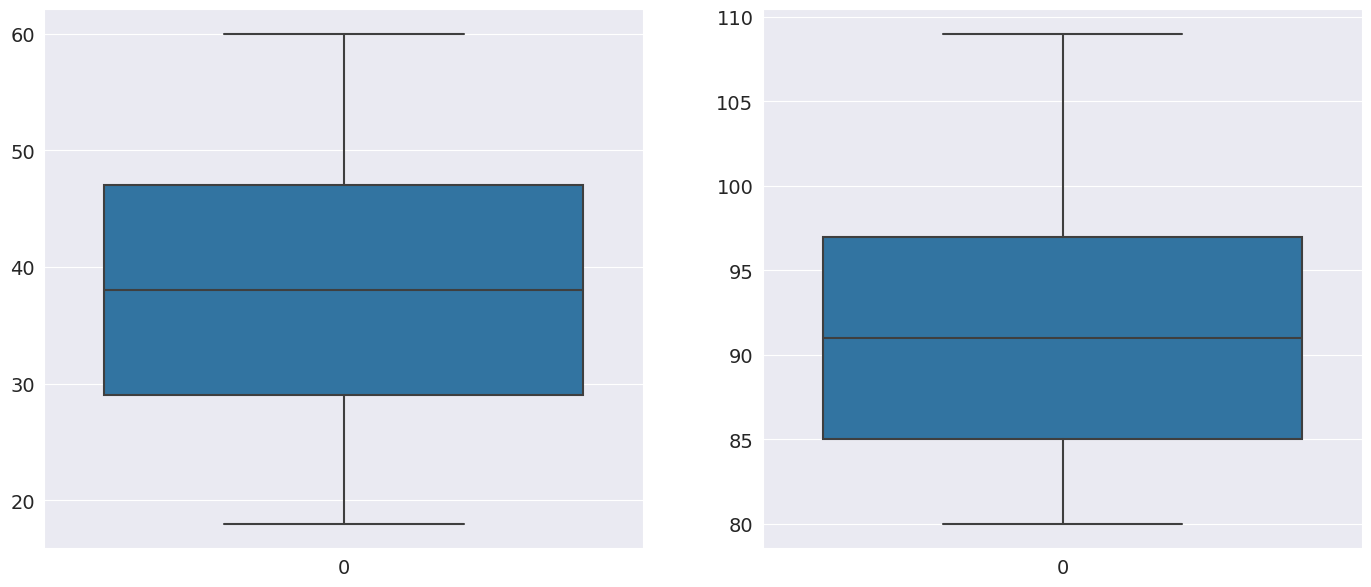

In [ ]:
features = ['age', 'bloodpressure']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.boxplot(insurance_new[col])
plt.show()

In [ ]:
insurance_new.shape, insurance_new[insurance_new['bloodpressure']<110].shape

((1317, 10), (1214, 10))

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in insurance_new.columns:
	if insurance_new[col].dtype == object:
		le = LabelEncoder()
		insurance_new[col] = le.fit_transform(insurance_new[col])


In [ ]:
insurance_new =insurance_new[insurance_new['bloodpressure']<110]

In [ ]:
insurance_new.shape

(1214, 10)

Let’s draw a heatmap to analyze the correlation between the variables of the dataset.

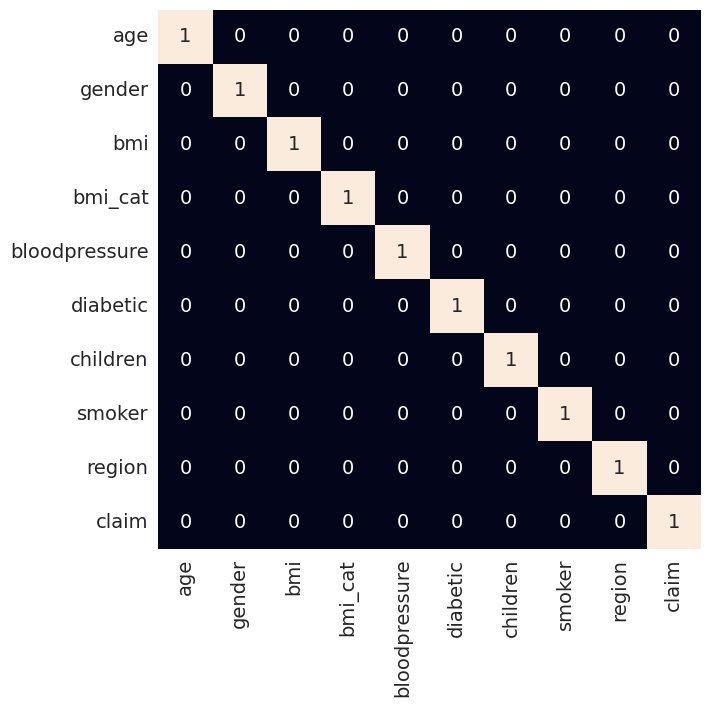

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(insurance_new.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


There is no highly correlation observed from above. 

Findings :-

Older people has to pay more premium than younger ones

Higher BMI persons has to pay more than lower ones

Having high number of childern means can only spend less expenses on insurance

In [ ]:
# Arranging dependent and independent variables for Modeling
x = insurance_new.drop('claim',axis=1)
Y = insurance_new.claim
x,Y

(       age  gender   bmi  bmi_cat  bloodpressure  diabetic  children  smoker  \
 0     39.0       1  23.2        1             91         1         0       0   
 1     24.0       1  30.1        2             87         0         0       0   
 2     43.0       1  33.3        2             82         1         0       0   
 3     43.0       1  33.7        2             80         0         0       0   
 4     43.0       1  34.1        2            100         0         0       0   
 ...    ...     ...   ...      ...            ...       ...       ...     ...   
 1329  52.0       0  37.7        4            109         1         0       1   
 1331  18.0       1  41.1        0            104         0         1       1   
 1335  44.0       0  35.5        4             88         1         0       1   
 1337  30.0       1  34.5        2             91         1         3       1   
 1338  37.0       1  30.4        2            106         0         0       1   
 
       region  
 0        

In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split

xtrain,xtest,Ytrain,Ytest = train_test_split(x,Y,test_size=1/4,random_state=1)

Here we have to find continous value, so we will buld regression models

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

#Linear Regression

from sklearn.linear_model import LinearRegression

le = LinearRegression()
le_model = le.fit(xtrain,Ytrain)
# predicting values for test data
le_Ypredict = le_model.predict(xtest)
print('MSE of Linear Regression : ' + str(round(mean_squared_error(Ytest,le_Ypredict),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(Ytest,le_Ypredict),2)))

MSE of Linear Regression : 33224475.03
r2 score of Linear Regression : 0.6


In [ ]:
le_model.score(xtest,Ytest)  #accuracy

0.6013063963133538

In [ ]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt_model = dt.fit(xtrain,Ytrain)
# predicting values for test data
dt_Ypredict = dt_model.predict(xtest)
print('MSE of DecisionTreeRegressor : ' + str(round(mean_squared_error(Ytest,dt_Ypredict),2)))
print('r2 score of DecisionTreeRegressor : ' + str(round(r2_score(Ytest,dt_Ypredict),2)))

MSE of DecisionTreeRegressor : 56451256.87
r2 score of DecisionTreeRegressor : 0.32


In [ ]:
# SVR

from sklearn.svm import SVR

sv = SVR()
sv_model = sv.fit(xtrain,Ytrain)
# predicting values for test data
sv_Ypredict = sv_model.predict(xtest)
print('MSE of SVR : ' + str(round(mean_squared_error(Ytest,sv_Ypredict),2)))
print('r2 score of SVR : ' + str(round(r2_score(Ytest,sv_Ypredict),2)))

MSE of SVR : 87539719.76
r2 score of SVR : -0.05


In [ ]:
sv_model.score(xtest,Ytest)  #accuracy

-0.05047638245668207

In [ ]:
# KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn_model = kn.fit(xtrain,Ytrain)
# predicting values for test data
kn_Ypredict = kn_model.predict(xtest)
print('MSE of KNeighborsRegressor : ' + str(round(mean_squared_error(Ytest,kn_Ypredict),2)))
print('r2 score of KNeighborsRegressor : ' + str(round(r2_score(Ytest,kn_Ypredict),2)))

MSE of KNeighborsRegressor : 84926373.05
r2 score of KNeighborsRegressor : -0.02


In [ ]:
kn_model.score(xtest,Ytest)  #accuracy

-0.01911622959584225

In [ ]:
# Consolidating with ensemble technics

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(xtrain,Ytrain)
# predicting values for test data
rf_Ypredict = rf_model.predict(xtest)
print('MSE of RandomForestRegressor : ' + str(round(mean_squared_error(Ytest,rf_Ypredict),2)))
print('r2 score of RandomForestRegressor : ' + str(round(r2_score(Ytest,rf_Ypredict),2)))
print('**************************')
rf_model.score(xtest,Ytest)  #accuracy

MSE of RandomForestRegressor : 24899385.17
r2 score of RandomForestRegressor : 0.7
**************************


0.7012074503748082

In [ ]:
# GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb_model = gb.fit(xtrain,Ytrain)
# predicting values for test data
gb_Ypredict = gb_model.predict(xtest)
print('MSE of GradientBoostingRegressor : ' + str(round(mean_squared_error(Ytest,gb_Ypredict),2)))
print('r2 score of GradientBoostingRegressor : ' + str(round(r2_score(Ytest,gb_Ypredict),2)))
print('********************************')
gb_model.score(xtest,Ytest)  #accuracy


MSE of GradientBoostingRegressor : 22229446.03
r2 score of GradientBoostingRegressor : 0.73
********************************


0.7332467123061667

In [ ]:
# XGradientBoostingRegressor
xgb = XGBRegressor()
xgb_model = xgb.fit(xtrain,Ytrain)
# predicting values for test data
xgb_Ypredict = xgb_model.predict(xtest)
print('MSE of XGBRegressor : ' + str(round(mean_squared_error(Ytest,xgb_Ypredict),2)))
print('r2 score of XGBRegressor : ' + str(round(r2_score(Ytest,xgb_Ypredict),2)))
print('************************************')
xgb_model.score(xtest,Ytest)  #accuracy


MSE of XGBRegressor : 29099534.15
r2 score of XGBRegressor : 0.65
************************************


0.6508056747919689

# **Gradient Boosting Algorithm is giving best performance for given problem**